In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas import crosstab
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import minmax_scale

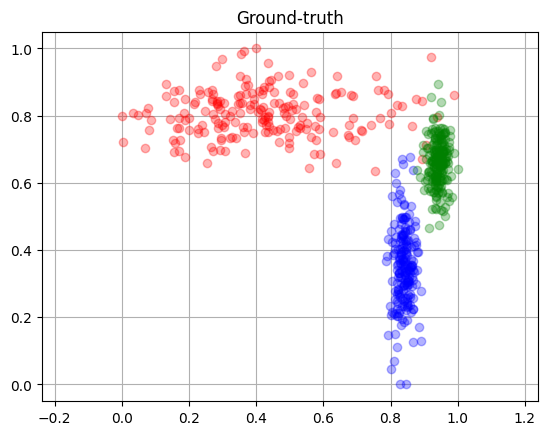

In [2]:
def plotblobs(X,y,n_clusters):
    cor = ['red','blue','green']
    for k in range(n_clusters):
        idx = np.where(y==k)
        ax.scatter(X[idx,0],X[idx,1],c=cor[k],zorder=3,
                marker='o',alpha=0.3)
    ax.axis('equal')
    ax.grid(visible=True,zorder=1)
    
    
np.random.seed(91)
n_clusters = 3
n_samples = 600

[X,y] = make_blobs(n_samples = n_samples, n_features=2, 
                   centers = [[-2,3],[0,0],[.5,2]], 
                   cluster_std = [[1,.5],[.1,.8],[.1,.5]])

X = minmax_scale(X,feature_range=(0,1))

ax = plt.axes()
plotblobs(X,y,n_clusters)
ax.set(title='Ground-truth');

In [3]:
np.random.seed(911)

max_iterations = 1000

tol = 1e-8 

# stop criterion
# 0 - Norm of medoids
# 1 - Decreasing cost 
stop_criterion = 1

# random initial medoids
medoids = np.random.permutation(n_samples)[:n_clusters]
initial_medoids = np.copy(medoids) 

In [4]:

cost = []
for i in range(max_iterations): 

    oldl2norm = np.linalg.norm(X[medoids])
    d2m = pairwise_distances(X, X[medoids])
    kmedoids_cluster = np.argmin(d2m,axis=1)

    cost.append(0)   
    for k in range(n_clusters):

        idx_cluster_samples = np.where(kmedoids_cluster==k)[0]
        p2p = pairwise_distances(X[idx_cluster_samples])

        intra_cluster_dispersion = np.sum(p2p,axis=1)
        idx = np.argmin(intra_cluster_dispersion)
    
        cost[i] = cost[i] + intra_cluster_dispersion[idx]
    
        medoids[k] = idx_cluster_samples[idx]
    
    newl2norm = np.linalg.norm(X[medoids])

    if(stop_criterion==1):
        if((abs(oldl2norm-newl2norm)/oldl2norm)<tol):
            break
    else:
        if(cost[i]>=cost[i-1]):
            break
             

Text(0, 0.5, 'Cost')

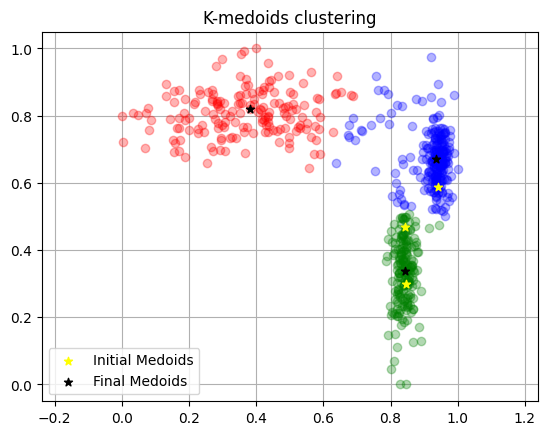

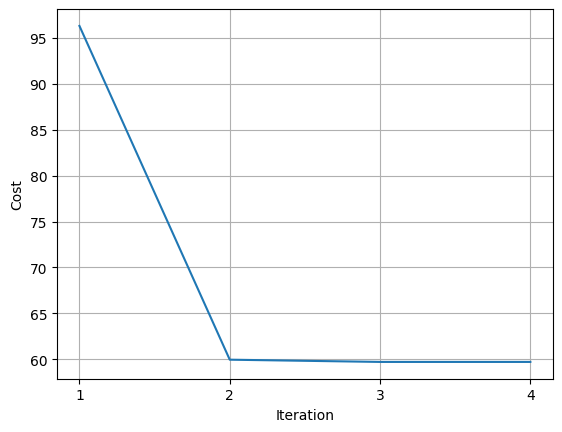

In [6]:
plt.figure()
ax = plt.axes()
plotblobs(X,kmedoids_cluster,n_clusters)

# plots initial and final medoids
ax.scatter(X[initial_medoids,0],X[initial_medoids,1],marker='*',c='yellow',zorder=4, label='Initial Medoids')
ax.scatter(X[medoids,0],X[medoids,1],marker='*',c='black',zorder=4, label='Final Medoids')
ax.legend(loc='lower left')
ax.set(title='K-medoids clustering')

plt.figure()
plt.plot(cost)
plt.grid(visible=True)
plt.xlabel('Iteration')
L = list(range(i+1))
rotulos = L+np.ones([1,len(L)])
plt.xticks(ticks=L,labels=[int(k) for k in list(rotulos[0])])
plt.ylabel('Cost')